In [1]:
# import commands

import pandas as pd
import numpy as np
from scripts import project_functions_gc as pfg
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

#### Seaborn figure theme

In [2]:
sns.set_theme(style="darkgrid",
              font_scale=1.3,
              palette='Pastel2'
             )
plt.rc('axes.spines', top=False, right=False)

# Exploratory Data Analysis & Thorough Analysis

#### Research questions
- Does providing more mental health resources improve employees' mental health in the tech industry?
- Is there a relationship between employees' mental health and their knowledge of the mental health resources available?

#### Variables in this dataset
- **family_history:** Do you have a family history of mental illness?
- **treatment:** Have you sought treatment for a mental health condition?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?

## Loading & processing data

In [3]:
mh0 = pfg.load_and_process('../../data/raw/mentalhealthintech.csv')
mh0

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help
0,Yes,Yes,Sometimes,1,1,2,2
1,No,Yes,Often,1,1,2,2
2,Yes,Yes,Rarely,1,0,0,1
3,No,No,N/A,0,0,2,0
4,Yes,Yes,Rarely,1,1,0,0
...,...,...,...,...,...,...,...
878,Yes,Yes,Sometimes,1,1,1,2
879,No,Yes,N/A,2,2,2,2
880,Yes,Yes,Often,1,1,2,2
881,Yes,Yes,Sometimes,1,1,2,2


## Overview of data

In [4]:
print(f'{mh0.shape[0]} rows, {mh0.shape[1]} columns')

883 rows, 7 columns


In [5]:
print(mh0.columns)

Index(['family_history', 'treatment', 'work_interfere', 'benefits',
       'care_options', 'wellness_program', 'seek_help'],
      dtype='object')


In [6]:
mh0.dtypes

family_history      object
treatment           object
work_interfere      object
benefits             int64
care_options         int64
wellness_program     int64
seek_help            int64
dtype: object

In [7]:
mh0.describe(include=['object'])

,family_history,treatment,work_interfere
count,883,883,883
unique,2,2,5
top,No,No,Sometimes
freq,551,447,328


## Pandas profiling

In [8]:
#ProfileReport(mh0).to_notebook_iframe()

### Observations and notes

- Ignored the duplicate row warning because it doesn't seem like a big problem in the context of this dataset
- More people have sought treatment for mental health issues than people who haven't sought treatment.
- A reasonable number of employees have knowledge about available mental health resources.

In [9]:
# sorted labels and dictionnaries
sorted_response_labels = ['Not sure', 'Yes', 'No']
sorted_freq_labels = ['Never', 'Rarely', 'Sometimes', 'Often']
sorted_yn_dict = {0:"Don't know", 1:'Yes', 2:'No'}

## Frequency of mental health issues

In [10]:
# getting counts and relative frequencies

treatment = pfg.count_rel_freq_df(mh0,'treatment')
treatment

,treatment,count,rel_freq
0,No,447,50.62
1,Yes,436,49.38


In [11]:
fam_hist = pfg.count_rel_freq_df(mh0,'family_history')
fam_hist

,family_history,count,rel_freq
0,No,551,62.4
1,Yes,332,37.6


In [12]:
# creating a new column that shows whether respondents have had a mental health condition based on responses to work_interfere
# Reference: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

mh0['condition'] = np.where(mh0['work_interfere'] != 'N/A', 'Yes', 'No')
mh0

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition
0,Yes,Yes,Sometimes,1,1,2,2,Yes
1,No,Yes,Often,1,1,2,2,Yes
2,Yes,Yes,Rarely,1,0,0,1,Yes
3,No,No,N/A,0,0,2,0,No
4,Yes,Yes,Rarely,1,1,0,0,Yes
...,...,...,...,...,...,...,...,...
878,Yes,Yes,Sometimes,1,1,1,2,Yes
879,No,Yes,N/A,2,2,2,2,No
880,Yes,Yes,Often,1,1,2,2,Yes
881,Yes,Yes,Sometimes,1,1,2,2,Yes


In [13]:
mh_condition = pfg.count_rel_freq_df(mh0, 'condition')
mh_condition

,condition,count,rel_freq
0,Yes,687,77.8
1,No,196,22.2


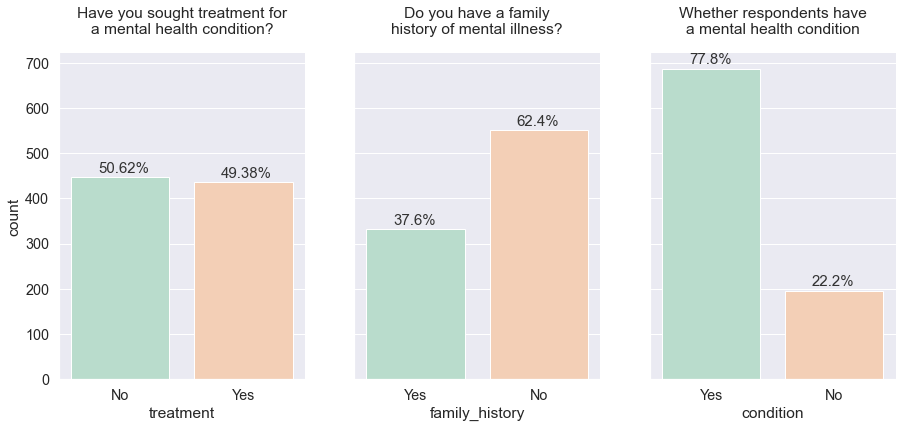

In [14]:
# references: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axes = plt.subplots(1,3, figsize=(15,6),sharey=True)

# plot 1: treatment
ax0 = sns.barplot(ax=axes[0], data=treatment, x='treatment', y='count')
pfg.rel_freq_label(ax0,0.22,10)
ax0.set_title('Have you sought treatment for\na mental health condition?', y=1.04)

# plot 2: family history
ax1 = sns.barplot(ax=axes[1], data=fam_hist, x='family_history', y='count', order=['Yes', 'No'])
pfg.rel_freq_label(ax1,0.22,10)
ax1.set_title('Do you have a family\nhistory of mental illness?', y=1.04)

# plot 3: whether they have a mental health condition or not
ax2 = sns.barplot(ax=axes[2], data=mh_condition, x='condition', y='count')
pfg.rel_freq_label(ax2,0.22,10)
ax2.set_title('Whether respondents have\na mental health condition', y=1.04)

for ax in axes.flat:
    ax.label_outer()

- Over half of respondents (63.03%) have sought treatment for a mental health condition, and a significant number of respondents have a mental health condition
- Even though over half of respondents have sought treatment for a mental health condition, it appears that not a lot of respondents have had a family history of mental illness.
    - I don't see anything wrong with this; family history is not necessarily a precondition for having mental health issues.

In [19]:
# Reference: https://www.codeforests.com/2020/07/18/calculate-percentage-within-group/
cond_seektreatment_groups = (mh0.groupby(['condition', 'treatment'])
                           .count()
                           .loc[:, ['family_history']]
                           .rename(columns={'family_history':'count'})
                          )

pfg.rel_freq_within_grp(cond_seektreatment_groups)
cond_seektreatment_groups['rel_freq'] = cond_seektreatment_groups['rel_freq'].apply(lambda x : round(x,2))

cond_seektreatment_index = cond_seektreatment_groups.reset_index()
cond_seektreatment_index

,condition,treatment,count,rel_freq
0,No,No,193,98.47
1,No,Yes,3,1.53
2,Yes,No,254,36.97
3,Yes,Yes,433,63.03


In [20]:
cond_seektreatment_groups

count  rel_freq
condition treatment                 
No        No           193     98.47
          Yes            3      1.53
Yes       No           254     36.97
          Yes          433     63.03

In [ ]:
# Reference: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=cond_seektreatment_index, x='condition', y='rel_freq', hue='treatment', order=('Yes', 'No'))

for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Frequency of mental health conditions,\nby whether respondents have sought treatment', y=1.01)

- Out of the 687 people who indicated mental health issues, a little over half have sought treatment (63.03%).
- However, over a quarter of people who have a mental health condition have not sought treatment (36.97%).

## Mental health issues interfering with work

In [21]:
# counts and relative frequencies

interfere = pfg.count_rel_freq_df(mh0,'work_interfere')
interfere

,work_interfere,count,rel_freq
0,Sometimes,328,37.15
1,N/A,196,22.20
2,Never,149,16.87
3,Rarely,124,14.04
4,Often,86,9.74


Text(0.5, 1.08, 'If you have a mental health condition, do you\nfeel that it interferes with your work?')

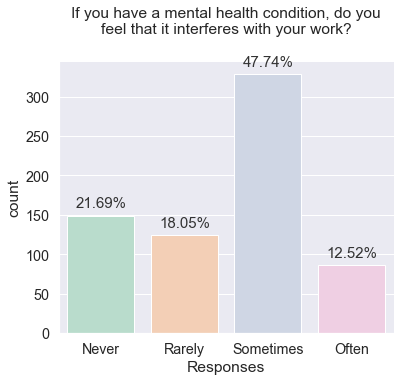

In [22]:
fig, ax = plt.subplots(figsize=(6,5))
g = sns.countplot(data=mh0, x='work_interfere',order=sorted_freq_labels)

pfg.rel_freq_label(g,0.1,10)

plt.xlabel('Responses', y=0.9)
g.set_title('If you have a mental health condition, do you\nfeel that it interferes with your work?', y=1.08)

- It appears to be quite common for mental health issues to interfere with work.

### work_interfere and treatment

In [87]:
interfere_treatment = mh_filtered_condition.groupby('treatment')['work_interfere'].value_counts().to_frame().rename(columns={'work_interfere':'count'})

pfg.rel_freq_within_grp(interfere_treatment)
interfere_treatment['withingrp_relfreq'] = interfere_treatment['rel_freq'].apply(lambda x : round(x,2))
interfere_treatment['rel_freq'] = round(((interfere_treatment['count'] / interfere_treatment['count'].sum()) * 100),2)

interfere_treatment

count  rel_freq  withingrp_relfreq
treatment work_interfere                                    
No        Never             127     18.49              50.00
          Sometimes          76     11.06              29.92
          Rarely             36      5.24              14.17
          Often              15      2.18               5.91
Yes       Sometimes         252     36.68              58.20
          Rarely             88     12.81              20.32
          Often              71     10.33              16.40
          Never              22      3.20               5.08

In [88]:
interfere_treatment_index = interfere_treatment.reset_index()
interfere_treatment_index

,treatment,work_interfere,count,rel_freq,withingrp_relfreq
0,No,Never,127,18.49,50.00
1,No,Sometimes,76,11.06,29.92
2,No,Rarely,36,5.24,14.17
3,No,Often,15,2.18,5.91
4,Yes,Sometimes,252,36.68,58.20
5,Yes,Rarely,88,12.81,20.32
6,Yes,Often,71,10.33,16.40
7,Yes,Never,22,3.20,5.08


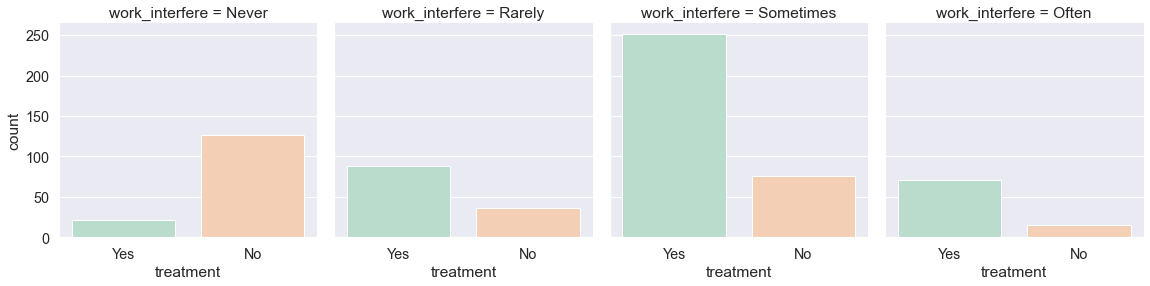

In [89]:
# Reference: https://seaborn.pydata.org/generated/seaborn.catplot.html

g = sns.catplot(x="treatment", col="work_interfere", col_wrap=4,
                data=mh0,
                kind="count", height=4, aspect=1, col_order=sorted_freq_labels)

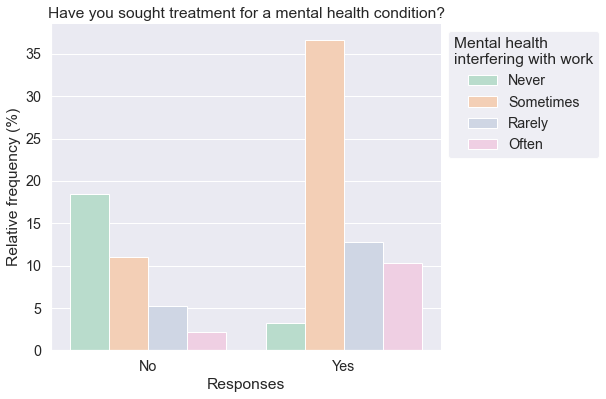

In [90]:
# another way to visualize work_interfere and treatment all at once

fig, ax = plt.subplots(figsize=(7,6))

g = sns.barplot(data=interfere_treatment_index, x='treatment', y='rel_freq', hue='work_interfere')

plt.title('Have you sought treatment for a mental health condition?')
plt.xlabel('Responses') and plt.ylabel('Relative frequency (%)')
plt.legend(bbox_to_anchor=(1,1), title='Mental health\ninterfering with work', edgecolor='1')

### work_interfere and family_history

In [91]:
interfere_history = mh0.groupby('family_history')['work_interfere'].value_counts().to_frame().rename(columns={'work_interfere':'count'})
pfg.rel_freq_within_grp(interfere_history)

interfere_history['rel_freq'] = round(((interfere_history['count'] / interfere_history['count'].sum()) * 100),2)
interfere_history['withingrp_relfreq'] = interfere_history['rel_freq'].apply(lambda x : round(x,2))
interfere_history

count  rel_freq  withingrp_relfreq
family_history work_interfere                                    
No             N/A               167     18.91              18.91
               Sometimes         152     17.21              17.21
               Never             123     13.93              13.93
               Rarely             72      8.15               8.15
               Often              37      4.19               4.19
Yes            Sometimes         176     19.93              19.93
               Rarely             52      5.89               5.89
               Often              49      5.55               5.55
               N/A                29      3.28               3.28
               Never              26      2.94               2.94

In [92]:
interfere_history_index = interfere_history.reset_index()
interfere_history_index

,family_history,work_interfere,count,rel_freq,withingrp_relfreq
0,No,N/A,167,18.91,18.91
1,No,Sometimes,152,17.21,17.21
2,No,Never,123,13.93,13.93
3,No,Rarely,72,8.15,8.15
4,No,Often,37,4.19,4.19
5,Yes,Sometimes,176,19.93,19.93
6,Yes,Rarely,52,5.89,5.89
7,Yes,Often,49,5.55,5.55
8,Yes,N/A,29,3.28,3.28
9,Yes,Never,26,2.94,2.94


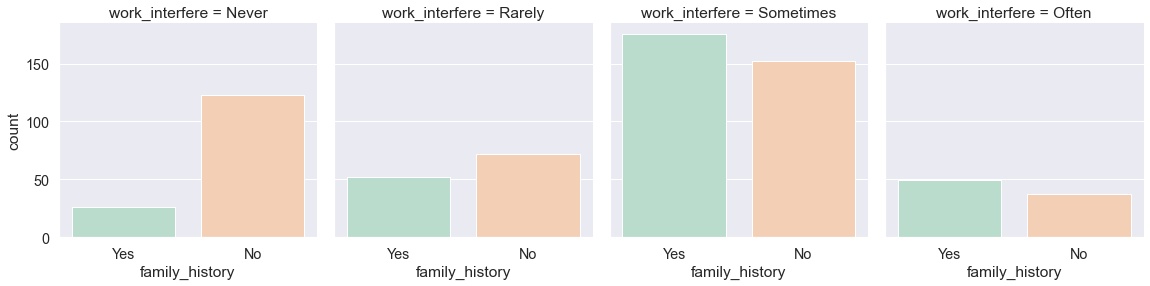

In [27]:
g = sns.catplot(x="family_history", col="work_interfere", col_wrap=4,
                data=mh0,
                kind="count", height=4, aspect=1, col_order=sorted_freq_labels)

Text(0.5, 1.0, 'If you have a mental health condition,\ndo you feel that it interferes with your work?')

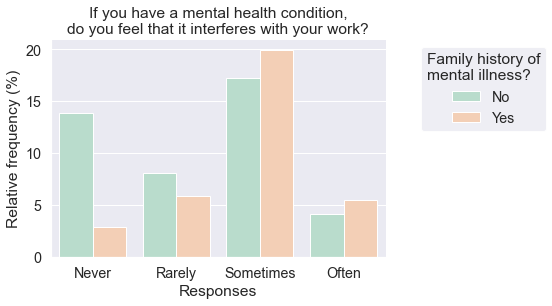

In [93]:
sns.barplot(data=interfere_history_index, x='work_interfere', y='rel_freq', hue='family_history', order=sorted_freq_labels)
plt.legend(title='Family history of\nmental illness?', bbox_to_anchor=(1.5,1), edgecolor='1')
plt.xlabel('Responses') and plt.ylabel('Relative frequency (%)')
plt.title('If you have a mental health condition,\ndo you feel that it interferes with your work?')

**Treatment** and **mental health interfering with work**
- Mental health interferes with work more often for people who have sought treatment for a mental health issue than for people who have not sought treatment for a mental health issue.

**Family history** and **mental health interfering with work**
- Among those who feel that mental health sometimes interferes with their work (over never, rarely, and often), there is no significant difference in family history of mental illness.
- Those with a family history of mental illness tend to rate their mental health condition as interfering with work more often than those without family histories of mental illness.

## Answering research questions
### Knowledge and provision of mental health resources

In [29]:
provision_knowledge = mh0[['benefits', 'care_options', 'wellness_program', 'seek_help']].melt()
provision_knowledge

,variable,value
0,benefits,1
1,benefits,1
2,benefits,1
3,benefits,0
4,benefits,1
...,...,...
3527,seek_help,2
3528,seek_help,2
3529,seek_help,2
3530,seek_help,2


In [59]:
provision_knowledge_counts = pfg.count_rel_freq_df(provision_knowledge, 'value').replace({2:'No', 1:'Yes', 0:"Don't know"})
provision_knowledge_counts

,value,count,rel_freq
0,No,1659,46.97
1,Yes,941,26.64
2,Don't know,932,26.39


Text(0.5, 0, 'Responses')

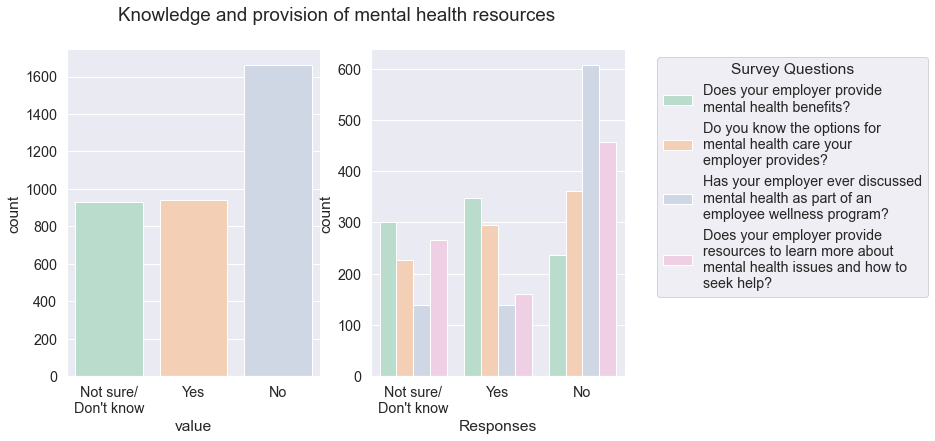

In [31]:
# Reference: https://stackoverflow.com/questions/51211538/pandas-seaborn-countplot-from-several-columns

fig, axes = plt.subplots(1,2, sharex=True, figsize=(10,6))
fig.suptitle('Knowledge and provision of mental health resources')

# 1st plot: without splitting into different questions
ax0 = sns.countplot(ax=axes[0], data=provision_knowledge.loc[provision_knowledge['value']!="NO"], x='value').set_xticklabels(["Not sure/\nDon't know", 'Yes', 'No'])

plt.legend(title='Survey Questions', bbox_to_anchor=(1.1,1), labels=('Does your employer provide\nmental health benefits?', 'Do you know the options for\nmental health care your\nemployer provides?','Has your employer ever discussed\nmental health as part of an\nemployee wellness program?','Does your employer provide\nresources to learn more about\nmental health issues and how to\nseek help?'))
plt.xlabel('Responses')

# split into different questions
ax1 = sns.countplot(ax=axes[1], data=provision_knowledge.loc[provision_knowledge['value']!="NO"], x='value', hue='variable').set_xticklabels(["Not sure/\nDon't know", 'Yes', 'No'])

plt.legend(title='Survey Questions', bbox_to_anchor=(1.1,1), labels=('Does your employer provide\nmental health benefits?', 'Do you know the options for\nmental health care your\nemployer provides?','Has your employer ever discussed\nmental health as part of an\nemployee wellness program?','Does your employer provide\nresources to learn more about\nmental health issues and how to\nseek help?'))
plt.xlabel('Responses')

**Initial observations:**
- Very few employers have ever discussed mental health as part of an employee wellness program.
- Not a lot of employers provide resources to learn more about mental health issues and seeking help.
    - Almost
- There seems to be a lot of uncertainty/lack of knowledge about mental health resources provided by employers.

**resource_provision**
This is an aggregate of columns assessing the status of employer provision of resources for mental health. "Resources" includes mental health benefits, communication about mental health, and resources on whether to seek further information and help.

In [54]:
resource_provision = (mh0[['benefits','wellness_program', 'seek_help']].melt()
                      .loc[:,['value']]
                      .value_counts()
                      .to_frame()
                      .reset_index()
                      .rename(columns={0:'count'})
                      .replace({2:'No', 1:'Yes', 0:"Don't know"})
                     )
                      
resource_provision['rel_freq'] = round(((resource_provision['count'] / resource_provision['count'].sum()) * 100),2)
resource_provision_counts = resource_provision
resource_provision_counts

,value,count,rel_freq
0,No,1298,49.00
1,Don't know,705,26.61
2,Yes,646,24.39


### Relationships between actual mental health and provision and knowledge of mental health resources

There was no survey question that directly asked about participants' mental health, so mental health was estimated based on whether the **work_interfere** question applied to participants. Data was grouped to give a count of those with a mental health condition (those who answered with anything but N/A) and those without a mental health condition (those who answered with N/A). The new **condition** column tells us whether or not respondents have a mental health condition.

The **work_interfere** variable can also be used as a rough proxy for the severity of mental health conditions among respondents. I say "rough" because the question ("If you have a mental health condition, do you feel that it interferes with your work?") only looks at the effects of mental health in the workplace, ignoring how it may manifest in other areas of one's life.

Additionally, the **treatment** variable can tell us a little bit about frequency of mental health issues, although it's necessary to point out that not everyone who faces mental health issues will seek out treatment for said issues. Thus, this variable is also merely a rough proxy.

Upon further consideration, the **family_history** variable does not tell us much about the frequency of mental health concerns, so I have decided to not use that variable, relying on **condition**, **treatment**, and **work_interfere** instead.

In [51]:
# this filtered dataset only contains respondents who indicated a mental health condition
mh_filtered_condition = mh0[mh0['work_interfere'].str.contains('N/A') == False].reset_index().drop('index', axis=1)
mh_filtered_condition

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition
0,Yes,Yes,Sometimes,1,1,2,2,Yes
1,No,Yes,Often,1,1,2,2,Yes
2,Yes,Yes,Rarely,1,0,0,1,Yes
3,Yes,Yes,Rarely,1,1,0,0,Yes
4,No,Yes,Sometimes,0,0,2,0,Yes
...,...,...,...,...,...,...,...,...
682,Yes,Yes,Sometimes,1,2,2,0,Yes
683,Yes,Yes,Sometimes,1,1,0,2,Yes
684,Yes,Yes,Sometimes,1,1,1,2,Yes
685,Yes,Yes,Often,1,1,2,2,Yes


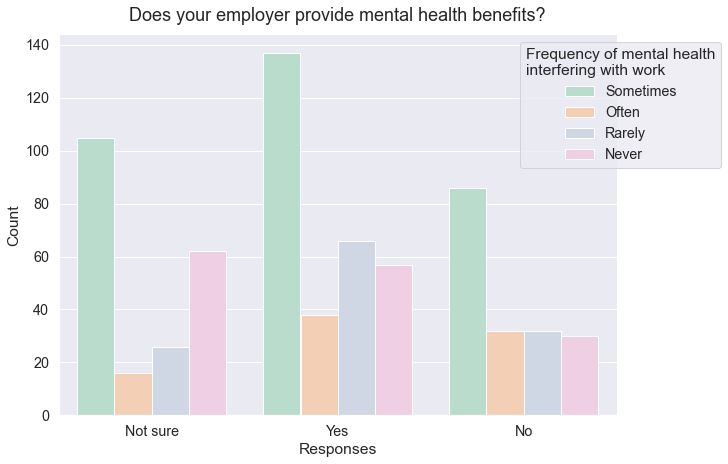

In [52]:
# Reference: https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend

fig, ax = plt.subplots(figsize=(10,7))
g = sns.countplot(data=mh_filtered_condition, x='benefits', hue='work_interfere')

g.set_xticklabels(sorted_response_labels)
plt.xlabel('Responses') and plt.ylabel('Count')

plt.title('Does your employer provide mental health benefits?', size=18, y=1.02)
leg = plt.legend(title='Frequency of mental health\ninterfering with work', bbox_to_anchor=(1.2,1))
leg._legend_box.align = "center"

# Analysis

- Knowledge of what mental health resources are available seems to contribute to the improvement of handling mental health issues. Thus, employers might need to be more intentional about informing employees about the resources available.